In [ ]:
!pip install matplotlib

In [1]:
from tensorflow import keras

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
print("Number of train images : ", x_train.shape[0])
print("Number of test images : ", x_test.shape[0])

print ("Number of channels : ", x_train.shape[3])
print("Image size : ", x_train.shape[1], x_train.shape[2])

class_names = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배','트럭' ]

Number of train images :  50000
Number of test images :  10000
Number of channels :  3
Image size :  32 32


In [4]:
# colab에선 실행 됨
!apt install fonts-nanum-coding

'apt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [ ]:
# 리눅스 경로
path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
fontprop = fm.FontProperties(fname=path)

In [5]:
from tensorflow.keras.utils import to_categorical

NUM_CLASSES = 10
if y_test.shape[1] == 1:
  x_train = x_train/255.
  x_test = x_test/255.
  y_train = to_categorical(y_train, NUM_CLASSES)
  y_test = to_categorical(y_test, NUM_CLASSES)

C:\Users\User\.conda\envs\tf210Py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\.conda\envs\tf210Py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\.conda\envs\tf210Py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\.conda\envs\tf210Py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\.conda\envs\tf210Py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canv

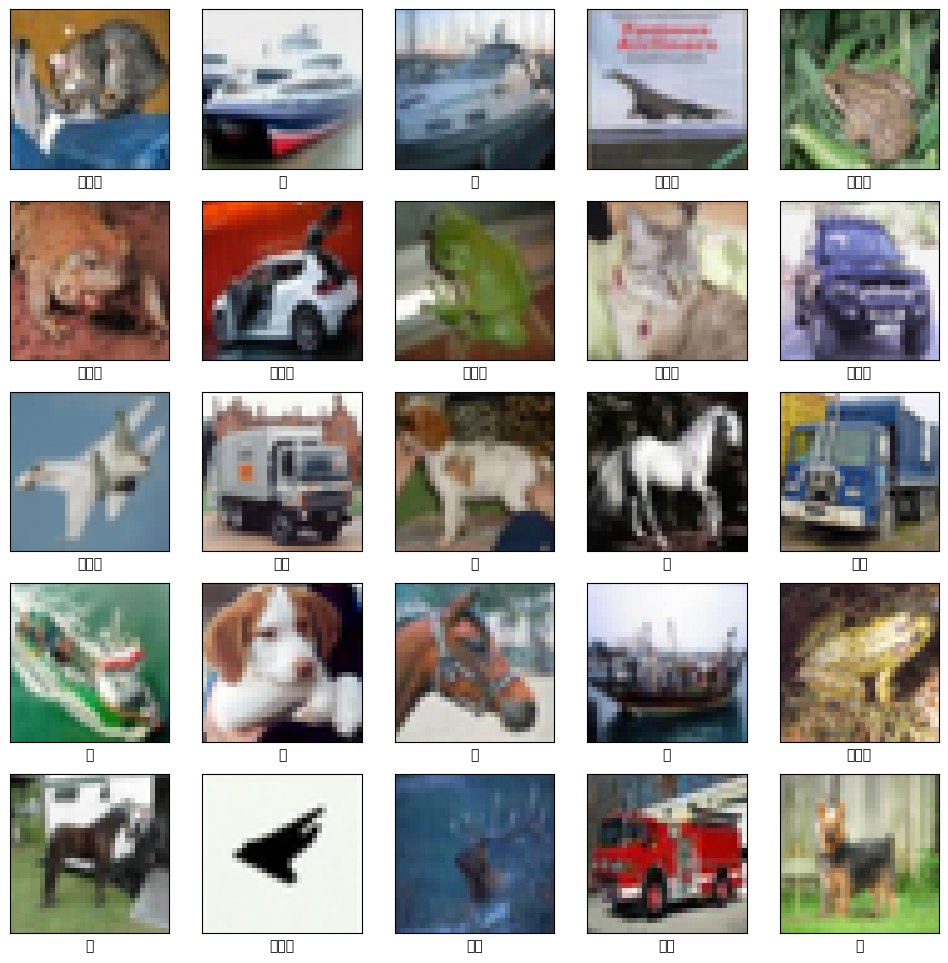

In [7]:
from matplotlib.offsetbox import FontProperties
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  # plt.xlabel(class_names[y_test[i].argmax()], fontproperties=fontprop)
  plt.xlabel(class_names[y_test[i].argmax()])
plt.show()

In [24]:
import tensorflow as tf

# 원본 이미지 데이터 크기 변경
x_train_resized = tf.image.resize(x_train, [64, 64]).numpy()
x_test_resized = tf.image.resize(x_test, [64, 64]).numpy()

model = keras.Sequential([
    # keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(64 ,64 ,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 256)         590080    
                                                                 
 flatten_6 (Flatten)         (None, 4096)             

In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

Epoch 1/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4382 - accuracy: 0.4763 - val_loss: 1.2459 - val_accuracy: 0.5650
Epoch 2/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0272 - accuracy: 0.6360 - val_loss: 0.9375 - val_accuracy: 0.6680
Epoch 3/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8490 - accuracy: 0.7015 - val_loss: 0.8894 - val_accuracy: 0.6883
Epoch 4/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7275 - accuracy: 0.7429 - val_loss: 0.8643 - val_accuracy: 0.6996
Epoch 5/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6277 - accuracy: 0.7781 - val_loss: 0.8097 - val_accuracy: 0.7303
Epoch 6/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5374 - accuracy: 0.8114 - val_loss: 0.8253 - val_accuracy: 0.7243
Epoch 7/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4599 - accuracy: 0.8383 - val_loss: 0.8592 - val_accuracy:

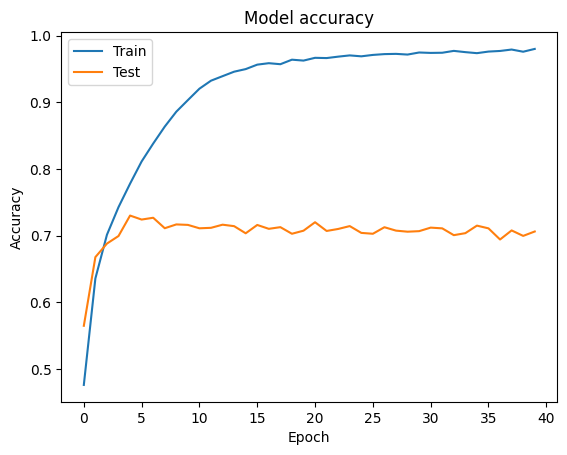

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

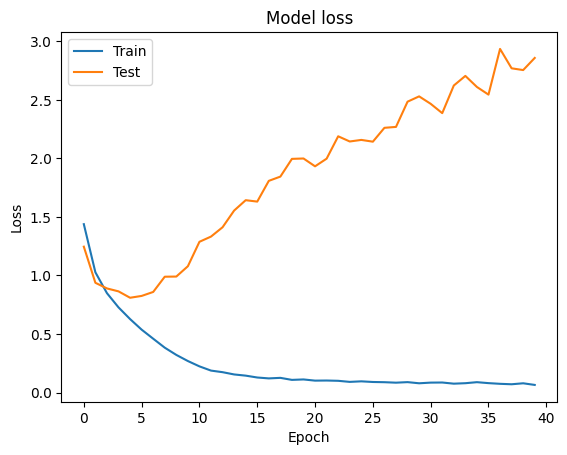

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy']
              )
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test))

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()